In [3]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import rv_continuous
#from astroquery.gaia import Gaia

In [4]:
#prior constant volume density
class ConstantVolumeDensity_gen(rv_continuous):
    def _pdf(self, x):
        return 3*np.power(x, 2)
ConstantVolumeDensity = ConstantVolumeDensity_gen(a=0.0, name="constant_volume")

In [5]:
#prior exponentially decreasing volume density
class ExponentiallyDecreasingVolumeDensity_gen(rv_continuous):
    def _pdf(self, x):
        return np.exp(-x)*np.power(x,2)/2
ExponentiallyDecreasingVolumeDensity =  ExponentiallyDecreasingVolumeDensity_gen (a=0.0, name="exponentially_decreasing")

In [6]:
#read data csv hasil query di gaia archive
df=pd.read_csv("gaia_parallax.csv")

In [7]:
#initial data
index=int(input())
parallax=df["parallax"][index]/1000
parallax_error=df["parallax_error"][index]/1000
parallax_over_error=df["parallax_over_error"]
df["f"]=1/parallax_over_error
f=df["f"][index]
df[["parallax", "parallax_error", "parallax_over_error", "f"]]

4


,parallax,parallax_error,parallax_over_error,f
0,0.171871,0.554753,0.309816,3.227727
1,0.347528,0.408004,0.851778,1.174015
2,2.777340,1.248430,2.224665,0.449506
3,1.305596,1.040140,1.255211,0.796679
4,0.436413,0.245671,1.776415,0.562932
5,0.893974,0.116678,7.661910,0.130516
6,0.358919,0.032282,11.118383,0.089941
7,-0.241496,-0.159440,-1.514658,-0.660215
8,0.509756,0.141692,3.597643,0.277960
9,1.161085,0.702364,1.653110,0.604920


In [8]:
#rmax dan jarak
rmax=6000
dist=np.linspace(1,rmax,10000)

#likelihood
likelihood=norm.pdf(x=1/dist, scale=parallax_error, loc=parallax)
normalisasi, _ =integrate.quad(lambda t:norm.pdf(x=1/t, scale=parallax_error, loc=parallax), a=0, b=rmax)
likelihood /= normalisasi

#prior 1 (uniform)
prior_1 = uniform.pdf(x=dist, scale=rmax)
posterior_1 = prior_1*likelihood
posterior_1_norm = integrate.simps(posterior_1, dist)
posterior_1 /= posterior_1_norm

#prior 2 (constant volume density)
prior_2=ConstantVolumeDensity.pdf(x=dist, scale=rmax)
posterior_2=prior_2*likelihood
posterior_2_norm=integrate.simps(posterior_2, dist)
posterior_2 /= posterior_2_norm

#prior 3 (exponentially decreasing volume density)
rlen=1000
prior_3=ExponentiallyDecreasingVolumeDensity.pdf(x=dist, scale=rlen)
posterior_3=prior_3*likelihood
posterior_3_norm=integrate.simps(posterior_3, dist)
posterior_3 /= posterior_3_norm

In [9]:
#print
print("parallax (mas) = ", parallax*1000)
print("parallax _error (mas) = ", parallax_error*1000)
print("f = ", f)
#x_limit = float()

parallax (mas) =  0.436412909
parallax _error (mas) =  0.24567061999999998
f =  0.5629315855733695


Text(0.5, 1.0, 'exponentially decreasing volume density rmax = 6000 pc')

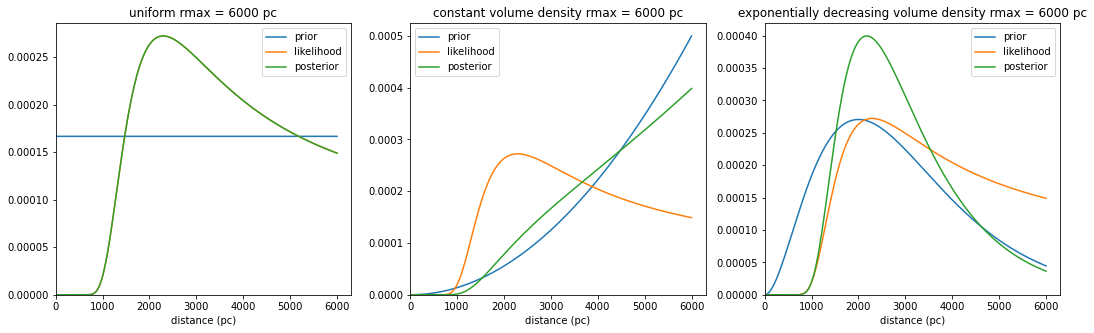

In [10]:
#plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
#1
ax1.plot(dist, prior_1, label="prior")
ax1.plot(dist, likelihood, label="likelihood")
ax1.plot(dist, posterior_1, label="posterior")
ax1.legend( 
ax1.grid
ax1.set_xlim(0)
ax1.set_ylim(0)
ax1.set_xlabel("distance (pc)")
ax1.set_title(f"uniform rmax = {int(rmax)} pc")
#2
ax2.plot(dist, prior_2, label="prior")
ax2.plot(dist, likelihood, label="likelihood")
ax2.plot(dist, posterior_2, label="posterior")
ax2.legend(loc="best")
ax2.grid
ax2.set_xlim(0)
ax2.set_ylim(0)
ax2.set_xlabel("distance (pc)")
ax2.set_title(f"constant volume density rmax = {int(rmax)} pc")
#3
ax3.plot(dist, prior_3, label="prior")
ax3.plot(dist, likelihood, label="likelihood")
ax3.plot(dist, posterior_3, label="posterior")
ax3.legend(loc="best")
ax3.grid
ax3.set_xlim(0)
ax3.set_ylim(0)
ax3.set_xlabel("distance (pc)")
ax3.set_title(f"exponentially decreasing volume density rmax = {int(rmax)} pc")
